# LA Collisions 

### Imports

In [32]:
import pandas as pd
import seaborn as sns
import pandasql as ps
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Read in Dataset

In [33]:
df = pd.read_csv("data/data.csv")

/Users/cheryljose/Documents/Projects/TestProject/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (37,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Get the Columns of Interest

In [34]:
df = df[["X", "Y", "collision_date", "collision_time", "day_of_week", "intersection", "weather_1", "location_type", "collision_severity", "number_killed", "number_injured", "party_count", "primary_coll_factor", "pcf_viol_category", "hit_and_run", "type_of_collision", "road_surface", "road_cond_1", "lighting", "control_device", "pedestrian_accident", "bicycle_accident", "motorcycle_accident", "truck_accident", "alcohol_involved", "count_ped_killed", "count_ped_injured", "count_bicyclist_killed", "count_bicyclist_injured"]]

### Review the Data

In [35]:
df.shape

(171533, 29)

In [36]:
df.iloc[0:5]

,X,Y,collision_date,collision_time,day_of_week,intersection,weather_1,location_type,collision_severity,number_killed,...,control_device,pedestrian_accident,bicycle_accident,motorcycle_accident,truck_accident,alcohol_involved,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured
0,-118.333485,34.035515,2012-05-12T00:00:00.000Z,220,6,N,A,NaN,3,0,...,A,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,-118.401978,34.201237,2012-03-18T00:00:00.000Z,1700,7,N,B,NaN,4,0,...,D,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,-118.268378,34.113093,2014-06-15T00:00:00.000Z,1945,7,N,A,NaN,4,0,...,D,NaN,NaN,NaN,NaN,Y,0,0,0,0
3,-118.473550,34.235558,2016-07-17T00:00:00.000Z,200,7,Y,A,R,0,0,...,A,NaN,NaN,NaN,NaN,Y,0,0,0,0
4,-118.400575,34.186689,2016-07-22T00:00:00.000Z,250,5,N,A,R,0,0,...,D,NaN,NaN,NaN,NaN,NaN,0,0,0,0


### Fix N/A Values

In [37]:
df['location_type']=df['location_type'].fillna('N')

In [38]:
df['pedestrian_accident']=df['pedestrian_accident'].fillna('N')

In [39]:
df['bicycle_accident']=df['bicycle_accident'].fillna('N')

In [40]:
df['motorcycle_accident']=df['motorcycle_accident'].fillna('N')

In [41]:
df['truck_accident']=df['truck_accident'].fillna('N')
df['alcohol_involved']=df['alcohol_involved'].fillna('N')

### Verify that All N/A Values are Fixed

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171533 entries, 0 to 171532
Data columns (total 29 columns):
X                          171533 non-null float64
Y                          171533 non-null float64
collision_date             171533 non-null object
collision_time             171533 non-null int64
day_of_week                171533 non-null int64
intersection               171533 non-null object
weather_1                  171533 non-null object
location_type              171533 non-null object
collision_severity         171533 non-null int64
number_killed              171533 non-null int64
number_injured             171533 non-null int64
party_count                171533 non-null int64
primary_coll_factor        171533 non-null object
pcf_viol_category          171533 non-null object
hit_and_run                171533 non-null object
type_of_collision          171533 non-null object
road_surface               171533 non-null object
road_cond_1                171533 non-null 

### Drop Duplicates

In [45]:
rows_before = df.shape[0]

In [46]:
df = df.drop_duplicates()

In [57]:
"""rows before: {}, rows after: {}, duplicate rows: {}""". \
format(rows_before, df.shape[0], rows_before - df.shape[0])

'rows before: 171533, rows after: 171522, duplicate rows: 11'

### Dropping Rows without Geo Location

In [63]:
ps.sqldf("select ROUND(X, 0), ROUND(Y, 0), count(*) from df group by 1,2 order by 1 desc,2 desc", locals())

,"ROUND(X, 0)","ROUND(Y, 0)",count(*)
0,0.0,0.0,2007
1,-118.0,34.0,148547
2,-119.0,34.0,20968


A small percentage of records have no geo location

In [64]:
ps.sqldf("select * from df where ROUND(X, 0) = 0 or ROUND(Y, 0) = 0", locals())

,X,Y,collision_date,collision_time,day_of_week,intersection,weather_1,location_type,collision_severity,number_killed,...,control_device,pedestrian_accident,bicycle_accident,motorcycle_accident,truck_accident,alcohol_involved,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured
0,0.0,0.0,2016-11-23T00:00:00.000Z,1940,3,Y,A,N,3,0,...,A,Y,N,N,N,N,0,1,0,0
1,0.0,0.0,2016-09-17T00:00:00.000Z,1910,6,N,A,N,0,0,...,D,N,N,N,N,Y,0,0,0,0
2,0.0,0.0,2016-09-19T00:00:00.000Z,1335,1,N,A,N,4,0,...,D,N,N,N,N,N,0,0,0,0
3,0.0,0.0,2016-09-14T00:00:00.000Z,2040,3,N,A,N,4,0,...,A,N,N,N,N,N,0,0,0,0
4,0.0,0.0,2016-09-09T00:00:00.000Z,1800,5,N,A,H,4,0,...,A,N,N,N,N,N,0,0,0,0
5,0.0,0.0,2012-10-18T00:00:00.000Z,1230,4,N,A,N,0,0,...,D,N,N,N,Y,N,0,0,0,0
6,0.0,0.0,2016-09-13T00:00:00.000Z,930,2,N,B,N,0,0,...,D,N,N,N,N,Y,0,0,0,0
7,0.0,0.0,2016-11-29T00:00:00.000Z,1605,2,N,A,N,4,0,...,A,N,N,N,N,Y,0,0,0,0
8,0.0,0.0,2015-06-06T00:00:00.000Z,1700,6,N,A,N,0,0,...,D,N,N,N,N,N,0,0,0,0
9,0.0,0.0,2016-10-04T00:00:00.000Z,1320,2,N,A,N,0,0,...,D,N,N,N,Y,N,0,0,0,0


I'll drop these records

In [65]:
rows_before = df.shape[0]
df = ps.sqldf("select * from df where ROUND(X, 0) != 0 and ROUND(Y, 0) != 0", locals())

In [67]:
"""rows before: {}, rows after: {}, rows dropped: {}""". \
format(rows_before, df.shape[0], rows_before - df.shape[0])

'rows before: 171522, rows after: 169515, rows dropped: 2007'

### Data Exploration

In [59]:
df.describe().transpose().head

<bound method NDFrame.head of                             count         mean         std         min  \
X                        171522.0  -116.976252   12.728680 -118.671096   
Y                        171522.0    33.681527    3.666561    0.000000   
collision_time           171522.0  1361.205326  607.723616    0.000000   
day_of_week              171522.0     4.015345    1.967924    1.000000   
collision_severity       171522.0     2.196249    1.800329    0.000000   
number_killed            171522.0     0.005743    0.079547    0.000000   
number_injured           171522.0     0.904578    1.002516    0.000000   
party_count              171522.0     2.112703    0.645196    1.000000   
count_ped_killed         171522.0     0.002559    0.051441    0.000000   
count_ped_injured        171522.0     0.082951    0.297530    0.000000   
count_bicyclist_killed   171522.0     0.000396    0.019907    0.000000   
count_bicyclist_injured  171522.0     0.062173    0.242866    0.000000   

       

In [ ]:
The 

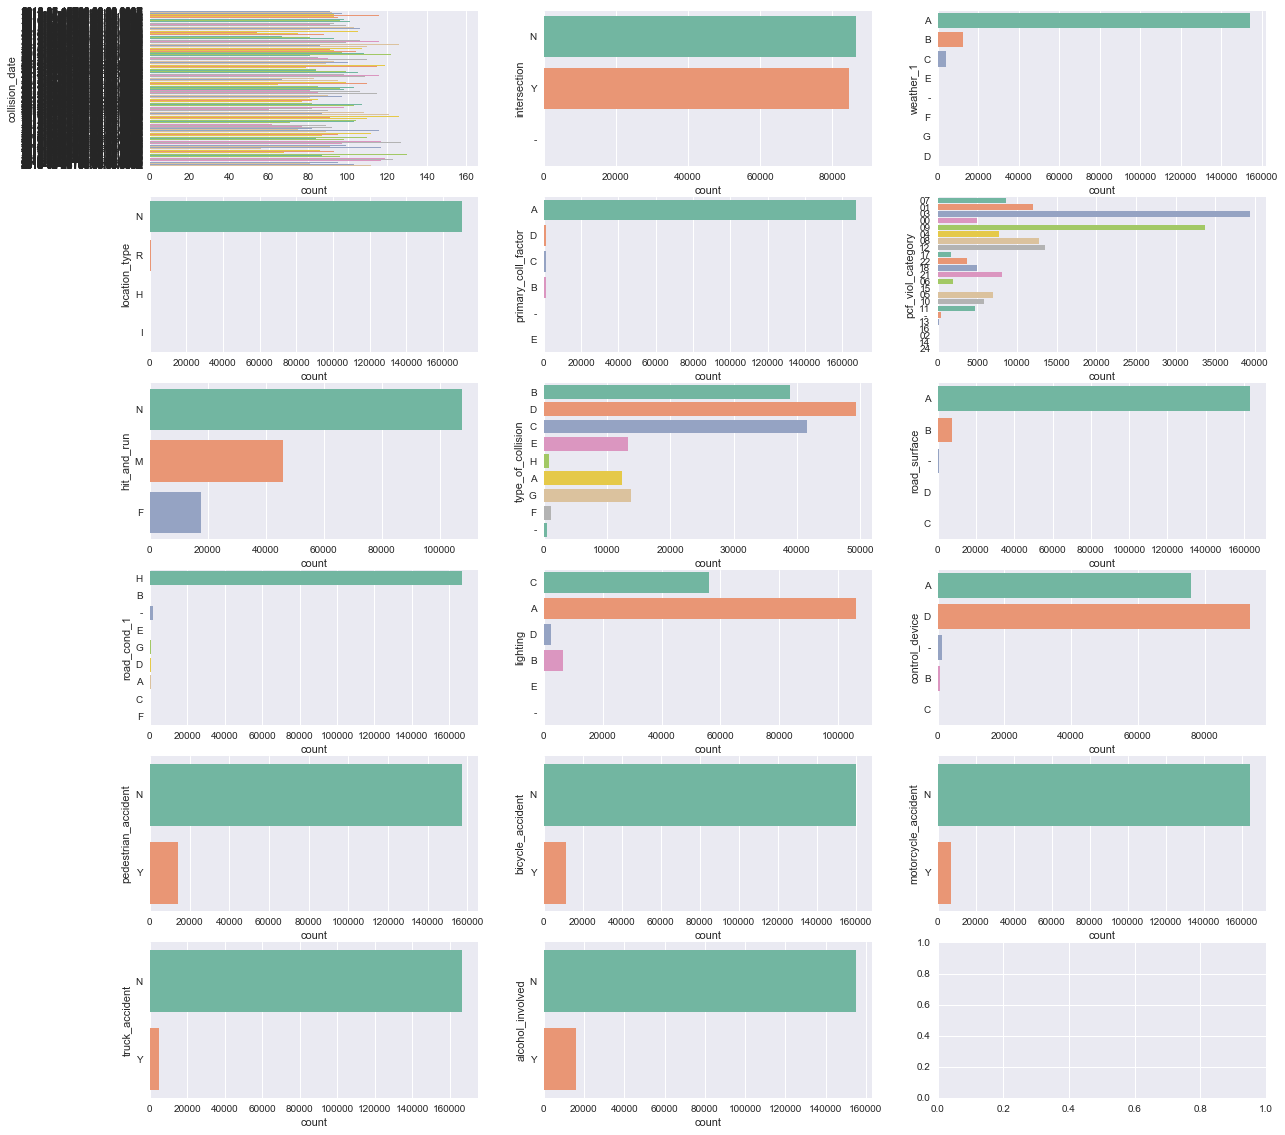

In [21]:
category_columns = []
i=0
for x in df.dtypes:
    if x == "object":
        category_columns.append(df.columns[i])
    i+=1
import math
COLUMNS = 3
plot_rows = math.ceil(len(category_columns)/COLUMNS)
fig, axs = plt.subplots(plot_rows,COLUMNS,figsize=(60/COLUMNS,60/COLUMNS))
col, row = 0, 0
for category in category_columns:    
    sns.countplot(y=category, data=df, palette="Set2",ax=axs[row][col])
    col += 1
    if col == COLUMNS:
        row += 1
        col = 0

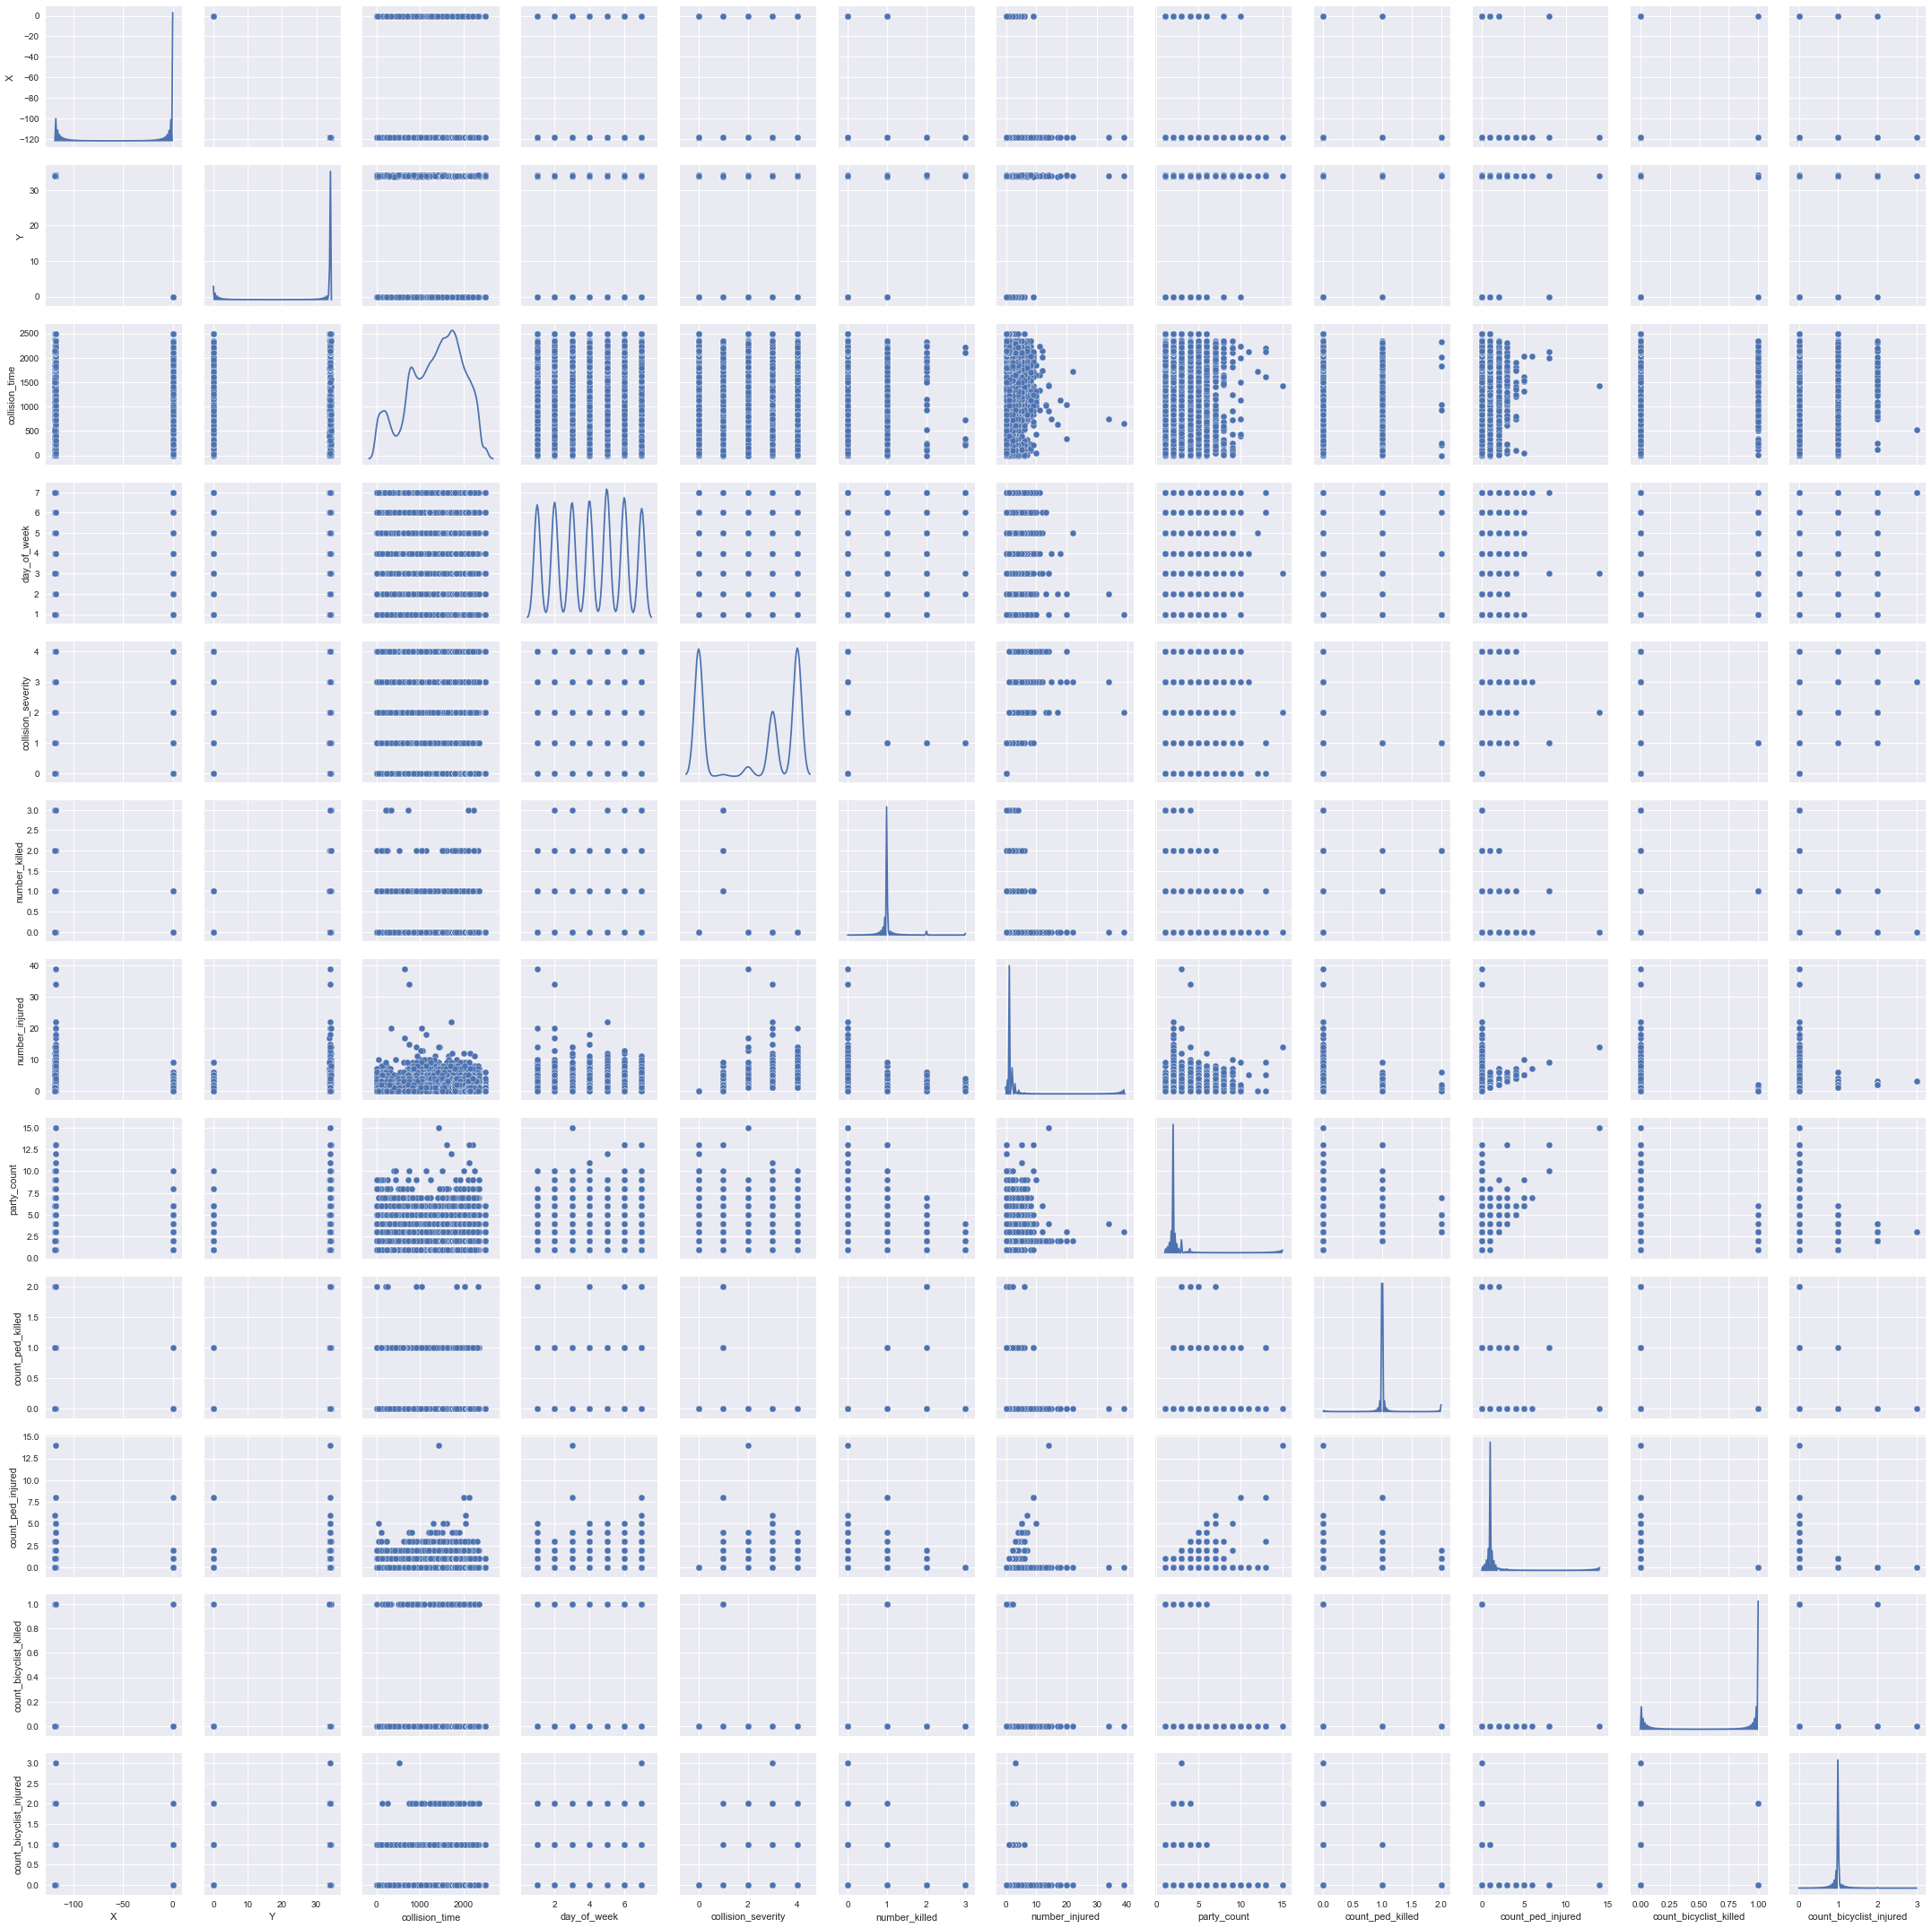

In [22]:
sns.pairplot(df, palette="Set2", diag_kind="kde", size=2.5)

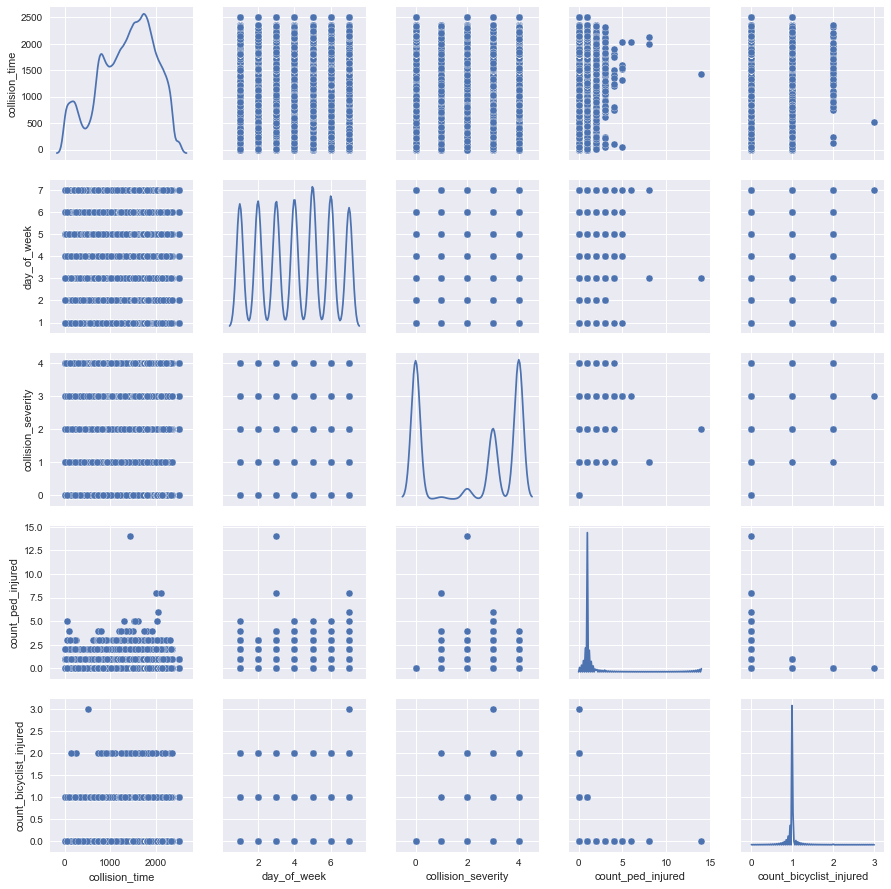

In [27]:
df2 = df[['collision_time', 'day_of_week', 'collision_severity', 'count_ped_injured', 'count_bicyclist_injured']]
sns.pairplot(df2, palette="Set2", diag_kind="kde", size=2.5)

In [28]:
df2.groupby(['count_bicyclist_injured']).count()


,collision_time,day_of_week,collision_severity,count_ped_injured
count_bicyclist_injured,,,,
0,160915,160915,160915,160915
1,10551,10551,10551,10551
2,55,55,55,55
3,1,1,1,1


ValueError: cannot label index with a null key

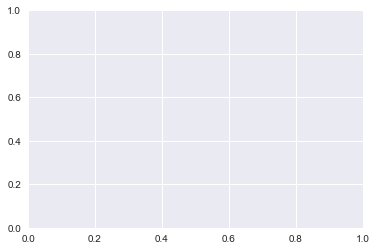

In [30]:
ax = sns.tsplot(data=df, err_style="boot_traces", n_boot=500)